In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
cols = ['a', 'b']
data = pd.read_csv('data/data.csv', header = None, names = cols)
data.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
x = data.drop('b', axis = 1)
y = data['b']

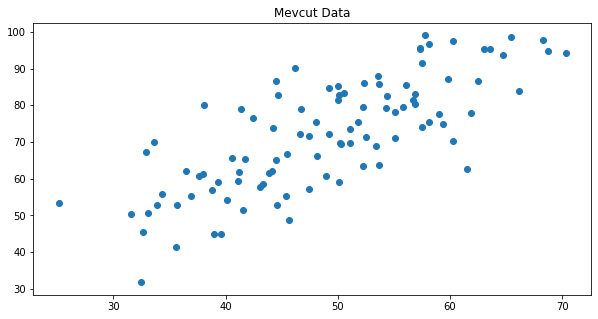

In [4]:
plt.scatter(x, y)
plt.title('Mevcut Data')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [6]:
y_pred_lr = lr.predict(x)

In [7]:
print("Intercept : ", lr.intercept_)
print("Coefficient : ", lr.coef_[0])

Intercept :  13.642154681481571
Coefficient :  1.1927057602312432


In [10]:
#Gradyan İniş Algoritması Devreye Alınırsa:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

m = 0 #intercept
c = 0 #coefficient

L = 0.0001 #learning rate
epochs = 1000

n = float(len(X))

for i in range(epochs):
    Y_pred = m*X + c 
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c
    
print("Intercept : ", m)
print("Coefficient :", c)

Intercept :  1.4582620978635645
Coefficient : 0.13106568099591231


In [11]:
Y_pred = m*X + c

-------------------Gradyan İnişsiz Sonuç---------------------


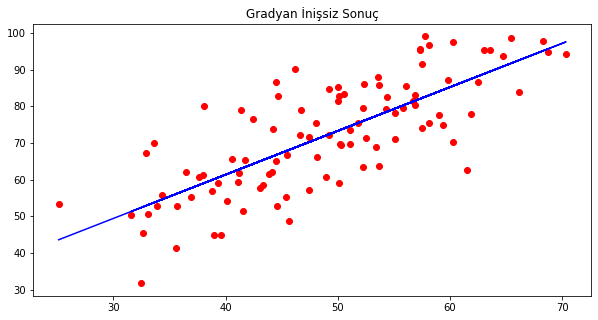

-------------------Gradyan İnişli Sonuç----------------------


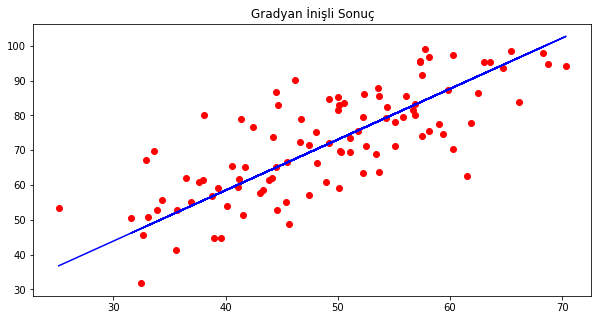

In [12]:
print("-------------------Gradyan İnişsiz Sonuç---------------------")
plt.scatter(x, y, color = 'red')
plt.plot(x, lr.predict(x), color = 'blue')
plt.title("Gradyan İnişsiz Sonuç")
plt.show()

print("-------------------Gradyan İnişli Sonuç----------------------")
plt.scatter(X, Y, color = 'red')
plt.plot(X, Y_pred, color = 'blue')
plt.title("Gradyan İnişli Sonuç")
plt.show()

In [13]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [14]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [16]:
X.shape, y.shape

((400, 2), (400,))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
#Normalizasyon, özellik ölçekleme
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
calculation = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Orijinal Purchased", "Tahmin Edilen Purchased"])
calculation

,Orijinal Purchased,Tahmin Edilen Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


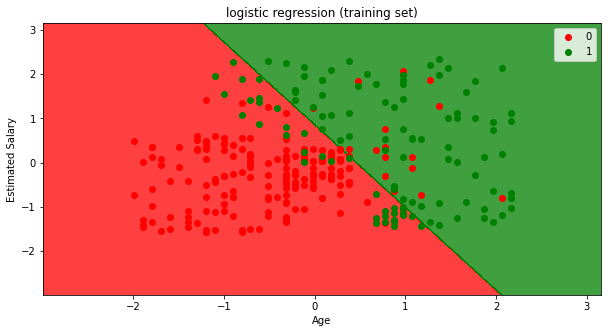

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('logistic regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


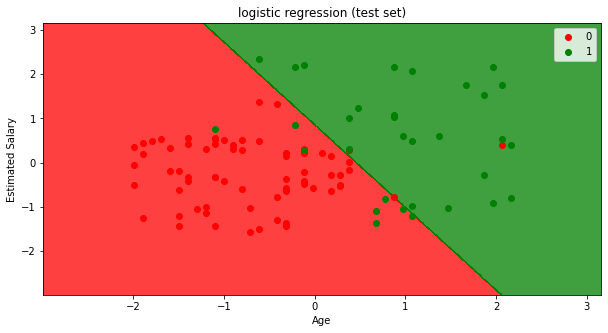

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('logistic regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [26]:
#Destek Vektör Makinaları (Support Vector Machines)
"""
1- Destek vektörleri : Hiperuzaya en yakın olan veri noktalarına destek vektörleri denir. 
2- Hiperuzay : Farklı sınıflara sahip olan bir grup nesneye bölünen bir karar uzayıdır. 
3- Margin (maximum marginal hyperplane) : Farklı sınıflara ait en yakın veri noktaları üzerindeki iki çizgi arasında kalan boşluktur. 
"""

'\n1- Destek vektörleri : Hiperuzaya en yakın olan veri noktalarına destek vektörleri denir. \n2- Hiperuzay : Farklı sınıflara sahip olan bir grup nesneye bölünen bir karar uzayıdır. \n3- Margin (maximum marginal hyperplane) : Farklı sınıflara ait en yakın veri noktaları üzerindeki iki çizgi arasında kalan boşluktur. \n'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

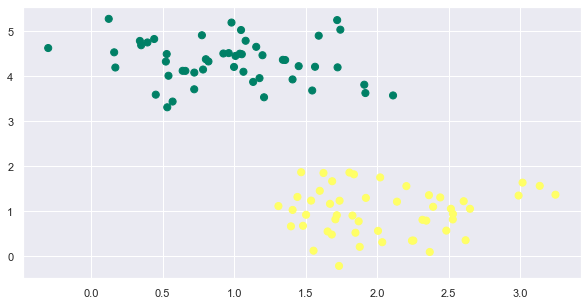

In [29]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.50)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')

(-1.0, 3.5)

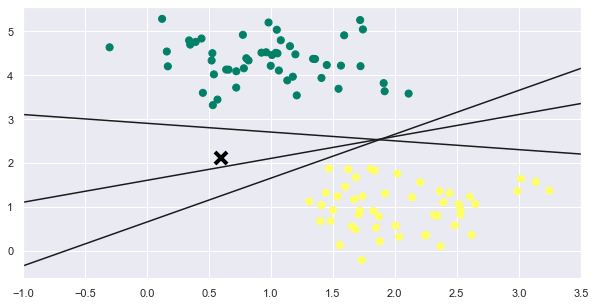

In [33]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color = 'black', markeredgewidth = 4, markersize = 12)

for m, b in [(1 , 0.65), (0.5, 1.6), (-0.2, 2.9)]:
             plt.plot(xfit, m * xfit + b, '-k')
             
plt.xlim(-1, 3.5)

(-1.0, 3.5)

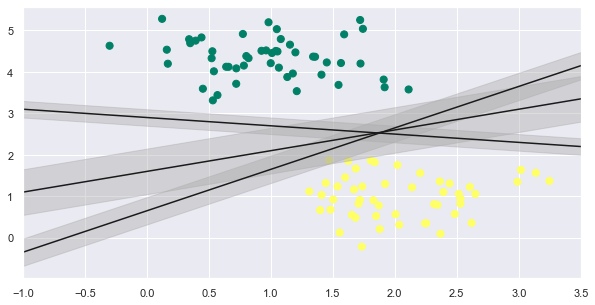

In [35]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap='summer')

for m, b, d in [(1 , 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit + d, yfit - d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)
             
plt.xlim(-1, 3.5)

In [42]:
from sklearn.svm import SVC #support vector classifier
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [43]:
def decision_function(model, ax = None, plot_support = True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0 , 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors = 'none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

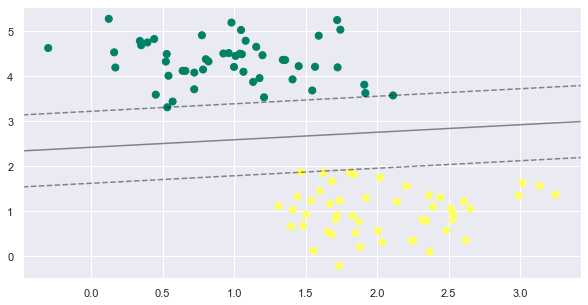

In [51]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
decision_function(model)

In [45]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [52]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.svm import SVC #support vector classifier
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [56]:
y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


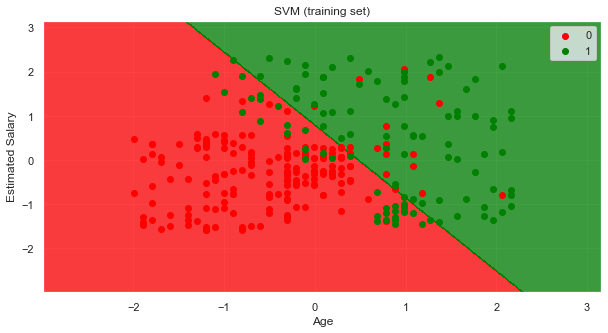

In [57]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


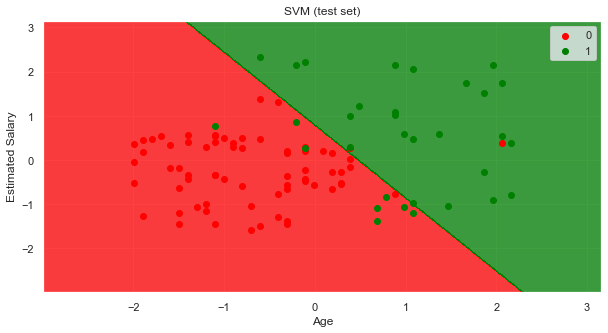

In [59]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [60]:
#KNN - K En Yakın Komşu Algoritması 
"""
Euclidean Distance (L2 norm)
Manhattan Distance(L1 norm)
Minkowski Distance (Lp norm)
Hamming Distance
"""

'\nEuclidean Distance (L2 norm)\nManhattan Distance(L1 norm)\nMinkowski Distance (Lp norm)\nHamming Distance\n'

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [62]:
data = pd.read_csv('data/data_cleaned.csv')
data.shape

(891, 25)

In [63]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [65]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [67]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [68]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56, stratify = y)

In [85]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [86]:
clf = KNN(n_neighbors = 10, metric = 'euclidean') #k = 10

clf.fit(train_x, train_y)

test_predict = clf.predict(test_x)
k_1 = f1_score(test_predict, test_y)

In [87]:
def Elbow(K):
    
    test_error = []
    
    for i in K:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        error = 1 - tmp
        test_error.append(error)
        
    return test_error

In [93]:
k = range(6, 30, 2)

In [94]:
test = Elbow(k)

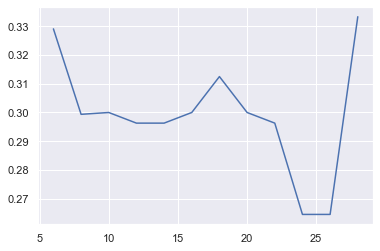

In [95]:
plt.plot(k, test)

In [96]:
clf = KNN(n_neighbors = 27)
clf.fit(train_x, train_y)

test_predict = clf.predict(test_x)
k_2 = f1_score(test_predict, test_y)

In [97]:
print("Dirsek öncesi Knn Skoru : ", k_1)
print("Dirsek sonrası Knn Skoru :", k_2)

Dirsek öncesi Knn Skoru :  0.7000000000000001
Dirsek sonrası Knn Skoru : 0.751592356687898
